In [6]:
pip install transformers torch sumy nltk

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
from transformers import pipeline

# Load pre-trained model for summarization
summarizer = pipeline("summarization", model="t5-small")

def abstractive_summarization(text, max_length=50):
    """Generate a summary using a transformer model."""
    summary = summarizer(text, max_length=max_length, min_length=20, do_sample=False)
    return summary[0]['summary_text']

# Example usage
sample_article = """
Artificial Intelligence (AI) is transforming industries across the globe.
Companies are leveraging AI for automation, decision-making, and analytics.
However, AI also raises concerns regarding bias, ethics, and job displacement.
AI models rely on large datasets to learn patterns and make predictions.
Many researchers emphasize the importance of transparency and fairness in AI.
Governments are working on regulations to ensure responsible AI development.
"""

summary = abstractive_summarization(sample_article, max_length=50)
print("Abstractive Summary:", summary)


Abstractive Summary: companies are leveraging AI for automation, decision-making, and analytics . however, AI raises concerns regarding bias, ethics, and job displacement .


In [8]:
pip install transformers torch sentencepiece


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
from transformers import pipeline

# Load the summarization pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Sample text
text = """Artificial Intelligence (AI) is transforming industries across the globe.
Companies are leveraging AI for automation, decision-making, and analytics.
However, AI also raises concerns regarding bias, ethics, and job displacement.
AI models rely on large datasets to learn patterns and make predictions.
Many researchers emphasize the importance of transparency and fairness in AI.
Governments are working on regulations to ensure responsible AI development."""

# Generate summary
summary = summarizer(text, max_length=100, min_length=30, do_sample=False)
print("Summarized Text:", summary[0]["summary_text"])


Your max_length is set to 100, but your input_length is only 85. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=42)


Summarized Text: AI models rely on large datasets to learn patterns and make predictions. Many researchers emphasize the importance of transparency and fairness in AI.Governments are working on regulations to ensure responsible AI development.


In [10]:
import json

# Load cleaned summarization dataset
with open("/Users/vivekmandal/Desktop/Ramu/aiproject/eda/summarization_data.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Display sample data
print("Sample Data:", data[:2])  # Show first two examples


Sample Data: [{'article': 'LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don\'t plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don\'t think I\'ll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK b

In [11]:
from transformers import pipeline

# Load T5-small model
t5_summarizer = pipeline("summarization", model="t5-small")

# Function to generate T5 summaries
def generate_t5_summary(article):
    return t5_summarizer(article, max_length=100, min_length=30, do_sample=False)[0]["summary_text"]

# Apply summarization to dataset
for i, sample in enumerate(data[:3]):  # Summarizing first 3 samples
    article = sample["article"]
    t5_summary = generate_t5_summary(article)
    print(f"\n🔹 T5-Small Summary {i+1}:\n", t5_summary)


Token indices sequence length is longer than the specified maximum sequence length for this model (638 > 512). Running this sequence through the model will result in indexing errors



🔹 T5-Small Summary 1:
 the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties . he will be able to gamble in a casino, buy a drink or see the horror film "Hostel: Part II" his agent and publicist had no comment on his plans . his latest outing as the boy wizard is breaking records on both sides of the Atlantic .

🔹 T5-Small Summary 2:
 inmates with most severe mental illnesses are incarcerated until they're ready to appear in court . judge says they often face drug charges or charges of assaulting an officer . "you need to get me out of here!" one man shouts at him . he's a strong advocate for justice and the mentally ill .

🔹 T5-Small Summary 3:
 survivor: "i probably had a 30-, 35-foot free fall. And there's cars on fire. the whole bridge is down" dozens of people were on the bridge when it collapsed . volunteers, EMTs managed to get 55 people into ambulances in less than two hours .


In [12]:
# Load BART-large model
bart_summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Function to generate BART summaries
def generate_bart_summary(article):
    return bart_summarizer(article, max_length=100, min_length=30, do_sample=False)[0]["summary_text"]

# Apply summarization to dataset
for i, sample in enumerate(data[:3]):  # Summarizing first 3 samples
    article = sample["article"]
    bart_summary = generate_bart_summary(article)
    print(f"\n🔹 BART Summary {i+1}:\n", bart_summary)



🔹 BART Summary 1:
 Harry Potter star Daniel Radcliffe turns 18 on Monday. He gains access to a reported £20 million ($41.1 million) fortune. Radcliffe's earnings from the first five Potter films have been held in a trust fund.

🔹 BART Summary 2:
 Judge Steven Leifman is an advocate for justice and the mentally ill. About one-third of all people in Miami-Dade county jails are mentally ill, he says. He says the sheer volume is overwhelming the system. Starting in 2008, many inmates will be sent to a new mental health facility.

🔹 BART Summary 3:
 NEW: "I probably had a 30-, 35-foot free fall," survivor Gary Babineau says. NEW: "My truck was completely face down, pointed toward the ground," survivor Bernie Toivonen says. Emergency room physician John Hink rushed to the scene in 15 minutes. Rescue effort was controlled and organized, he says; opposite of collapse.


In [13]:
# Compare T5, BART, and human summaries
for i, sample in enumerate(data[:3]):  # First 3 samples
    article = sample["article"]
    human_summary = sample["summary"]
    t5_summary = generate_t5_summary(article)
    bart_summary = generate_bart_summary(article)

    print(f"\n🔹 Sample {i+1}:")
    print("📌 Human-Written Summary:", human_summary)
    print("🤖 T5-Small Summary:", t5_summary)
    print("🤖 BART Summary:", bart_summary)



🔹 Sample 1:
📌 Human-Written Summary: Harry Potter star Daniel Radcliffe gets £20M fortune as he turns 18 Monday . Young actor says he has no plans to fritter his cash away . Radcliffe's earnings from first five Potter films have been held in trust fund .
🤖 T5-Small Summary: the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties . he will be able to gamble in a casino, buy a drink or see the horror film "Hostel: Part II" his agent and publicist had no comment on his plans . his latest outing as the boy wizard is breaking records on both sides of the Atlantic .
🤖 BART Summary: Harry Potter star Daniel Radcliffe turns 18 on Monday. He gains access to a reported £20 million ($41.1 million) fortune. Radcliffe's earnings from the first five Potter films have been held in a trust fund.

🔹 Sample 2:
📌 Human-Written Summary: Mentally ill inmates in Miami are housed on the "forgotten floor" Judge Steven Leifman says most are there as a result of 

In [14]:
pip install rouge-score


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Evaluate first 3 samples
for i, sample in enumerate(data[:3]):
    human_summary = sample["summary"]
    t5_summary = generate_t5_summary(sample["article"])
    bart_summary = generate_bart_summary(sample["article"])

    t5_scores = scorer.score(human_summary, t5_summary)
    bart_scores = scorer.score(human_summary, bart_summary)

    print(f"\n🔹 Sample {i+1}:")
    print("📌 Human Summary:", human_summary)
    print("🤖 T5 Summary:", t5_summary)
    print("📊 T5 ROUGE Scores:", t5_scores)
    print("\n🤖 BART Summary:", bart_summary)
    print("📊 BART ROUGE Scores:", bart_scores)



🔹 Sample 1:
📌 Human Summary: Harry Potter star Daniel Radcliffe gets £20M fortune as he turns 18 Monday . Young actor says he has no plans to fritter his cash away . Radcliffe's earnings from first five Potter films have been held in trust fund .
🤖 T5 Summary: the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties . he will be able to gamble in a casino, buy a drink or see the horror film "Hostel: Part II" his agent and publicist had no comment on his plans . his latest outing as the boy wizard is breaking records on both sides of the Atlantic .
📊 T5 ROUGE Scores: {'rouge1': Score(precision=0.24242424242424243, recall=0.41025641025641024, fmeasure=0.3047619047619048), 'rouge2': Score(precision=0.16923076923076924, recall=0.2894736842105263, fmeasure=0.21359223300970875), 'rougeL': Score(precision=0.19696969696969696, recall=0.3333333333333333, fmeasure=0.2476190476190476)}

🤖 BART Summary: Harry Potter star Daniel Radcliffe turns 18 on 

In [17]:
import json
import pandas as pd
from rouge_score import rouge_scorer
from transformers import pipeline, AutoTokenizer

# Load Summarization Models & Tokenizers
t5_summarizer = pipeline("summarization", model="t5-small")
bart_summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

t5_tokenizer = AutoTokenizer.from_pretrained("t5-small")
bart_tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")

# Load Dataset
with open("/Users/vivekmandal/Desktop/Ramu/aiproject/eda/summarization_data.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Take First 100 Articles
data_sample = data[:10]

# Initialize ROUGE Scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Function to Truncate Text to 512 Tokens Properly
def truncate_text(text, tokenizer, max_tokens=512):
    tokens = tokenizer.encode(text, truncation=True, max_length=max_tokens, return_tensors="pt")
    return tokenizer.decode(tokens[0], skip_special_tokens=True)

# Function to Generate T5 Summary
def generate_t5_summary(text, max_length=150, min_length=30):
    text = truncate_text(text, t5_tokenizer, max_tokens=512)  # Proper truncation
    return t5_summarizer(text, max_length=max_length, min_length=min_length, do_sample=False)[0]['summary_text']

# Function to Generate BART Summary
def generate_bart_summary(text, max_length=150, min_length=30):
    text = truncate_text(text, bart_tokenizer, max_tokens=512)  # Proper truncation
    return bart_summarizer(text, max_length=max_length, min_length=min_length, do_sample=False)[0]['summary_text']

# Store Results
results = []

for i, sample in enumerate(data_sample):
    article = sample["article"]
    human_summary = sample["summary"]
    
    # Generate Summaries
    t5_summary = generate_t5_summary(article)
    bart_summary = generate_bart_summary(article)

    # Compute ROUGE Scores
    t5_scores = scorer.score(human_summary, t5_summary)
    bart_scores = scorer.score(human_summary, bart_summary)

    # Store Results
    results.append({
        "Article": i+1,
        "T5_ROUGE1": t5_scores["rouge1"].fmeasure,
        "T5_ROUGE2": t5_scores["rouge2"].fmeasure,
        "T5_ROUGEL": t5_scores["rougeL"].fmeasure,
        "BART_ROUGE1": bart_scores["rouge1"].fmeasure,
        "BART_ROUGE2": bart_scores["rouge2"].fmeasure,
        "BART_ROUGEL": bart_scores["rougeL"].fmeasure,
    })

# Convert to DataFrame
df = pd.DataFrame(results)

# Display Results
print(df.head(10))


Token indices sequence length is longer than the specified maximum sequence length for this model (514 > 512). Running this sequence through the model will result in indexing errors


   Article  T5_ROUGE1  T5_ROUGE2  T5_ROUGEL  BART_ROUGE1  BART_ROUGE2  \
0        1   0.313725   0.220000   0.294118     0.657895     0.432432   
1        2   0.232558   0.023810   0.139535     0.551020     0.354167   
2        3   0.333333   0.181818   0.266667     0.430108     0.197802   
3        4   0.203390   0.035088   0.169492     0.400000     0.176471   
4        5   0.200000   0.000000   0.111111     0.425000     0.153846   
5        6   0.175824   0.000000   0.109890     0.222222     0.000000   
6        7   0.260000   0.000000   0.120000     0.244898     0.020833   
7        8   0.409639   0.197531   0.265060     0.341463     0.175000   
8        9   0.457831   0.222222   0.240964     0.553846     0.285714   
9       10   0.259740   0.080000   0.233766     0.352941     0.121212   

   BART_ROUGEL  
0     0.631579  
1     0.428571  
2     0.279570  
3     0.257143  
4     0.275000  
5     0.161616  
6     0.142857  
7     0.219512  
8     0.338462  
9     0.264706  


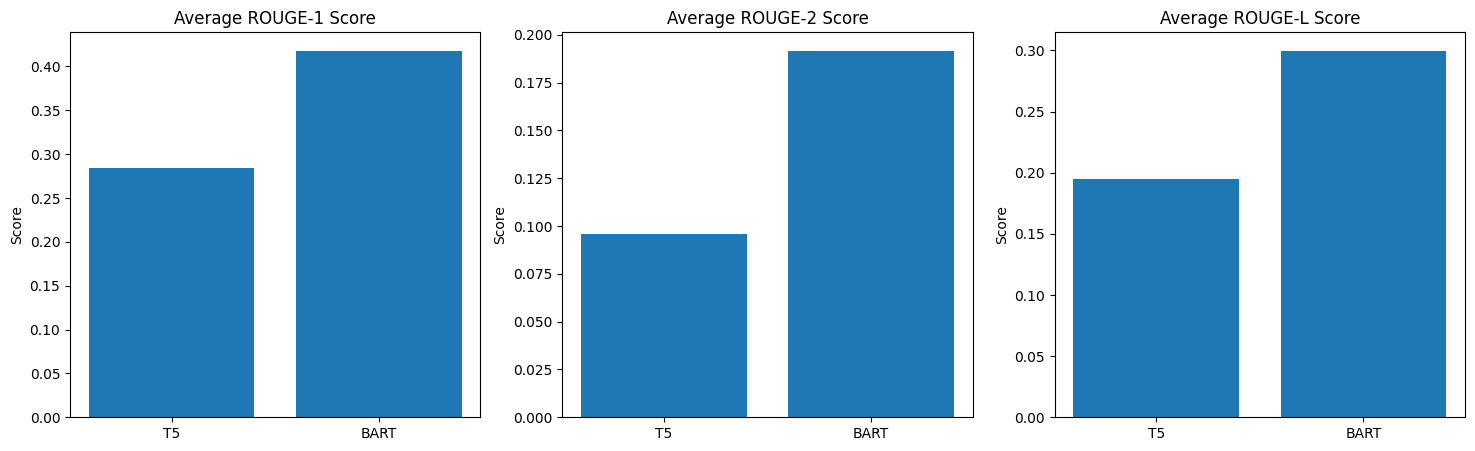

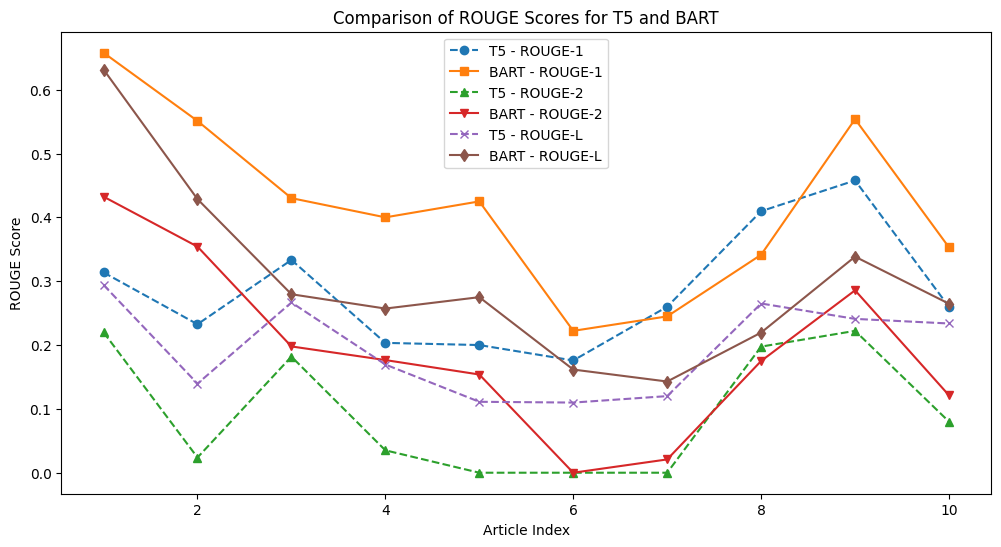

In [18]:
import matplotlib.pyplot as plt

# Plot ROUGE-1, ROUGE-2, and ROUGE-L as Bar Charts
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ROUGE-1
axes[0].bar(["T5", "BART"], [df["T5_ROUGE1"].mean(), df["BART_ROUGE1"].mean()])
axes[0].set_title("Average ROUGE-1 Score")
axes[0].set_ylabel("Score")

# ROUGE-2
axes[1].bar(["T5", "BART"], [df["T5_ROUGE2"].mean(), df["BART_ROUGE2"].mean()])
axes[1].set_title("Average ROUGE-2 Score")
axes[1].set_ylabel("Score")

# ROUGE-L
axes[2].bar(["T5", "BART"], [df["T5_ROUGEL"].mean(), df["BART_ROUGEL"].mean()])
axes[2].set_title("Average ROUGE-L Score")
axes[2].set_ylabel("Score")

# Show Plots
plt.show()

# Line Plot to Compare ROUGE Scores Over Articles
plt.figure(figsize=(12, 6))
plt.plot(df["Article"], df["T5_ROUGE1"], label="T5 - ROUGE-1", linestyle="--", marker="o")
plt.plot(df["Article"], df["BART_ROUGE1"], label="BART - ROUGE-1", linestyle="-", marker="s")
plt.plot(df["Article"], df["T5_ROUGE2"], label="T5 - ROUGE-2", linestyle="--", marker="^")
plt.plot(df["Article"], df["BART_ROUGE2"], label="BART - ROUGE-2", linestyle="-", marker="v")
plt.plot(df["Article"], df["T5_ROUGEL"], label="T5 - ROUGE-L", linestyle="--", marker="x")
plt.plot(df["Article"], df["BART_ROUGEL"], label="BART - ROUGE-L", linestyle="-", marker="d")

# Labels and Title
plt.xlabel("Article Index")
plt.ylabel("ROUGE Score")
plt.title("Comparison of ROUGE Scores for T5 and BART")
plt.legend()
plt.show()
